In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [54]:
# Define the derivative of the sigmoid function
def dsigmoid(x):
    return x * (1 - x)

In [55]:
# Define the forward propagation function
def forward_propagation(X, W1, b1, W2, b2):
    # Input layer to hidden layer
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)

    # Hidden layer to output layer
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    return a1, a2

In [56]:
# Define the backward propagation function
def backward_propagation(X, Y, a1, a2, W2):
    # Compute the error in the output layer
    error_output = Y - a2
    delta_output = error_output * dsigmoid(a2)

    # Compute the error in the hidden layer
    error_hidden = np.dot(delta_output, W2.T)
    delta_hidden = error_hidden * dsigmoid(a1)

    return delta_output, delta_hidden

In [57]:
# Define the gradient descent function to update weights and biases
def update_weights(X, a1, delta_output, delta_hidden, W1, b1, W2, b2, learning_rate):
    # Update weights and biases for the output layer
    W2 += np.dot(a1.T, delta_output) * learning_rate
    b2 += np.sum(delta_output, axis=0) * learning_rate

    # Update weights and biases for the hidden layer
    W1 += np.dot(X.T, delta_hidden) * learning_rate
    b1 += np.sum(delta_hidden, axis=0) * learning_rate

    return W1, b1, W2, b2

In [58]:
# Defining the XOR gate input and output
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

Y = np.array([[0],
              [1],
              [1],
              [0]])

In [59]:
# Initialize weights and biases
input_dim = 2
hidden_dim = 2
output_dim = 1
learning_rate = 0.1

In [60]:
np.random.seed(1)
W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

In [61]:
# Training loop
epochs = 10000
for epoch in range(epochs):
    # Forward propagation
    a1, a2 = forward_propagation(X, W1, b1, W2, b2)

    # Backward propagation
    delta_output, delta_hidden = backward_propagation(X, Y, a1, a2, W2)

    # Update weights and biases
    W1, b1, W2, b2 = update_weights(X, a1, delta_output, delta_hidden, W1, b1, W2, b2, learning_rate)


In [62]:
# Print final predictions
print("Final predictions after training:")
print(a2)

Final predictions after training:
[[0.04698822]
 [0.9450739 ]
 [0.94369346]
 [0.07384886]]


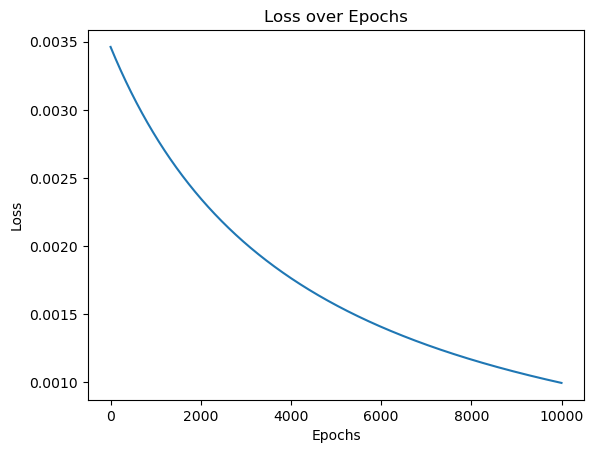

In [63]:
# Define the loss function
def compute_loss(Y, a2):
    return np.mean((Y - a2) ** 2)

# Initialize lists to store loss and epochs
losses = []
epochs = []

# Training loop
for epoch in range(10000):
    # Forward propagation
    a1, a2 = forward_propagation(X, W1, b1, W2, b2)

    # Compute loss
    loss = compute_loss(Y, a2)

    # Backward propagation
    delta_output, delta_hidden = backward_propagation(X, Y, a1, a2, W2)

    # Update weights and biases
    W1, b1, W2, b2 = update_weights(X, a1, delta_output, delta_hidden, W1, b1, W2, b2, learning_rate)

    # Store loss and epoch
    losses.append(loss)
    epochs.append(epoch)

# Plot the loss over epochs
plt.plot(epochs, losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()